### Von-May function

Write a function which solves the Von-May-Equation.


#### Problem description:

<blockquote>The starting point for our analysis is the ‘Von-May-Equation’, which is given by <br>

    
**\begin{align}    
y_{t+1} = r \cdot y_{t} \cdot (1-y_{t}),
\end{align}**

with  $r$ an pre-defined parameter and $y$ the function value at time $t$ and $t+1$.</blockquote>

In [1]:
import matplotlib.pyplot as plt

def von_may(y0,r):
    '''
    This function integrates the Von-May Equationn using a then initial condition y0, 
    and the parameter r

    Example: von_may(0.5, 3.95)

    Author: Tobias Sauter
    Date:   07/04/2022

    '''

    # Assignments
    yi = y0    
    result = [yi]

    # Integrate over 50 time steps
    for t in range(500):
        y = r*yi*(1-yi)    # Von-May-Gleichung
        yi = y             # Store new values for next step
        result.append(y)   # Append the y-value to the result list

    return(result)



Run the code for several initial and parameter combination. What is particularly striking about increasing r-values?


```
y(0)=0.5 and r=2.80 (alternatively, use y(0)=0.9) 
y(0)=0.5 and r=3.30 (alternatively, use y(0)=0.9) 
y(0)=0.5 and r=3.95 (alternatively, use y(0)=0.495) 
y(0)=0.8 and r=2.80 

```

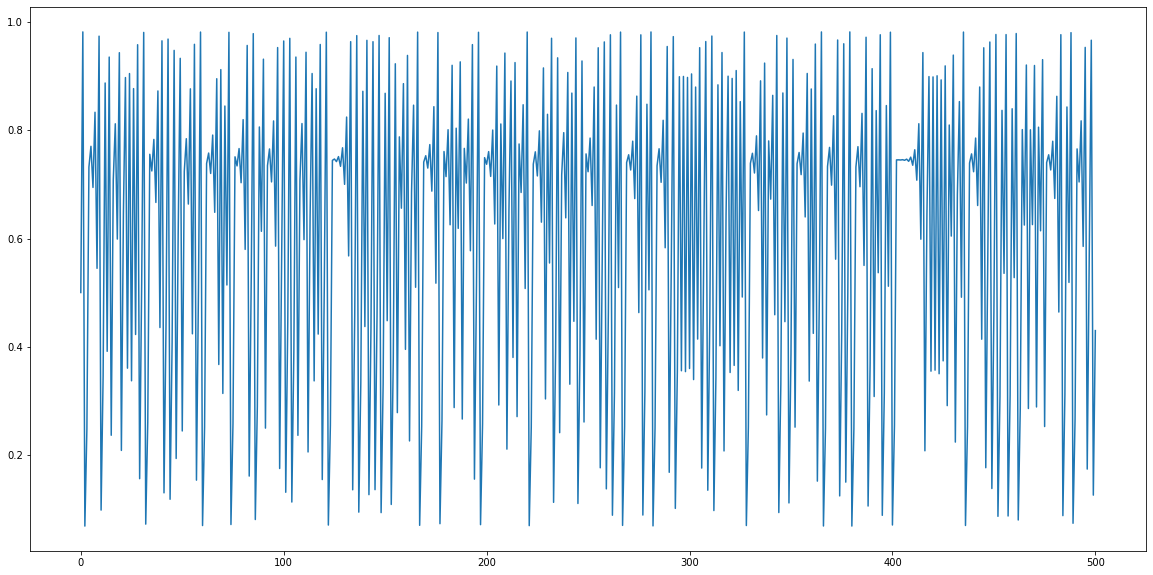

In [2]:
# Integrate the equation
res = von_may(0.5,3.93)

# Plot the equation
plt.figure(figsize=(20,10))
plt.plot(res)

### Extend the Von-May function
Extend this Von-May function by generating 20 random r-values and run simulations with them. Sample the values from a normal distribution with mean 3.95 and standard deviation 0.015 (limit the r-values between 0 and 4). Then average over all time series. Plot both the time series, the averaged time series and the histogram of the averaged time series. What do you observe?

In [3]:
import random
import numpy as np

def ensemble_may(n, y0, r):
    '''
    The function runs n ensemble members of the Von-May-Equation. The function takes the 
    initial condition y0, the parameter r, and the number of ensemble members n.

    Example: ensemble(50, 0.5, 3.95)

    Author: Tobias Sauter
    Date:   07/04/2022

    '''

    # Assignments     
    result = []
    random.seed()
    # Generate ensemble members
    for ens_member in range(n):
        
        # Generate random parameter r
        rnd = random.normalvariate(r,0.02)
        if rnd<=0 or rnd>4:
            # set constraints for the random number 0<rnd<4
            while rnd<=0 or rnd>4:
                rnd = random.normalvariate(r,0.02);
                
        # Integrate the equation
        result.append(von_may(y0,rnd))
        
        
    return(result)



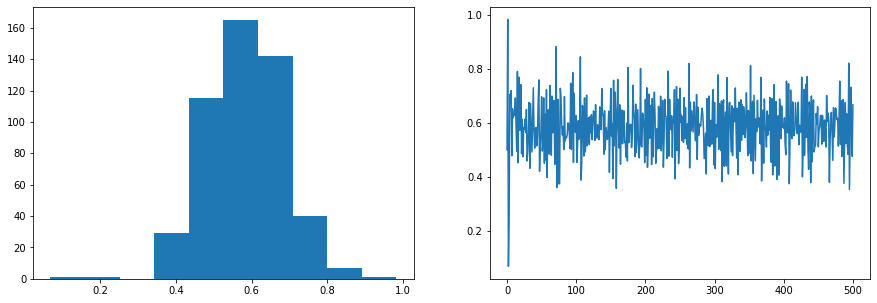

In [4]:
ens = ensemble_may(10, 0.5, 3.93)
ens_mean = np.mean(np.array(ens),axis=0)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(ens_mean)
ax[1].plot(ens_mean)

### Revisit the EBM-Model

#### Include a dynamic transmissivity in the energy balance model.

Run the energy balance model $T(0)=288 ~ K$, $C_w= 2\cdot10^8 ~ J/(m^2
 57 \cdot K)$, $\alpha=0.3$, and $\tau_{mean}=0.64 (\pm 3\%)$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ebmStochastic(SWin,T0,c,alpha,tau,years):
    ''' This is a simple Energy Balance Model with global radiation and outgoing longwave radiation.

    Syntax: ebm(T0,c,alpha,tau)

    with
    T0     :: Initial temperature (Kelvin)
    c      :: Heat capacity J/(m2*K)
    alpha  :: Albedo [-]
    tau    :: Transmissivity [-]

    Example: ebm(273.2, 10e8, 0.3, 0.64)

    Author: Tobias Sauter
    Date:   06/04/2022
    '''

    # Constants
    epsilon = 5.67e-8;    # Stefan-Bolzmann Constant (W/(m2*K4);

    # Time step
    steps = 10;                           # days
    dt = 60*60*24*steps;                  # convert days to seconds
    integration = (365/steps)*years;      # Integrate over x years

    # Init arrays and variables
    timeseries = [];
    Ti = T0;

    # Calculation
    for z in range(int(integration)):
        tau_rnd = random.normalvariate(tau,tau*0.03)
        T = Ti + (dt/c * (SWin - alpha*SWin - 0.95*epsilon*(Ti**4)*tau_rnd))
        timeseries.append(T);
        Ti = T;
        
    return np.array(timeseries)

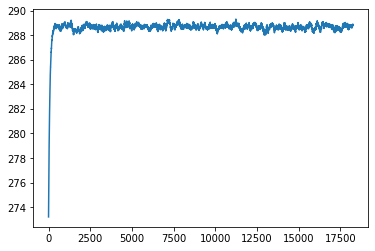

In [6]:
ts = ebmStochastic(342,273,2*10**8,0.3,0.64,500)
plt.plot(ts)

#### Extend the model with a simple ice/land use albedo parameterisation. 

In this parameterisation, the albedo is solely a function of mean temperature. As a non-linear function we assume a sigmoid function with

\begin{align}
\alpha(T_i) = 0.3 \cdot (1-0.025 \cdot \tanh(1.548 \cdot (T_i-288))).
\end{align}

Run the energy balance model with four different initial conditions for $T(0)=288 ~ K$, while fixing the other parameters to $C_w= 2\cdot10^8 ~ J/(m^2 \cdot K)$, $\alpha=0.3$, and $\tau_{mean}=0.64%)$ What can be said about the state of equilibrium?

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def ebmIceAlbedo(SWin,T0,c,alpha,tau,years):
    ''' This is a simple Energy Balance Model with global radiation and outgoing longwave radiation.

    Syntax: ebm(T0,c,alpha,tau)

    with
    T0     :: Initial temperature (Kelvin)
    c      :: Heat capacity J/(m2*K)
    alpha  :: Albedo [-]
    tau    :: Transmissivity [-]

    Example: ebm(273.2, 10e8, 0.3, 0.64)

    Author: Tobias Sauter
    Date:   06/04/2022
    '''

    # Constants
    epsilon = 5.67e-8;    # Stefan-Bolzmann Constant (W/(m2*K4);

    # Time step
    steps = 10;                           # days
    dt = 60*60*24*steps;                  # convert days to seconds
    integration = (365/steps)*years;      # Integrate over x years

    # Init arrays and variables
    timeseries = [];
    Ti = T0;

    # Calculation
    for z in range(int(integration)):
        alpha_adapt = alpha * (1 - 0.025 * np.tanh(1.548*(Ti-288.67)))
        T = Ti + (dt/c * (SWin - alpha_adapt*SWin - 0.95*epsilon*(Ti**4)*tau))
        timeseries.append(T);
        Ti = T;
        
    return np.array(timeseries)

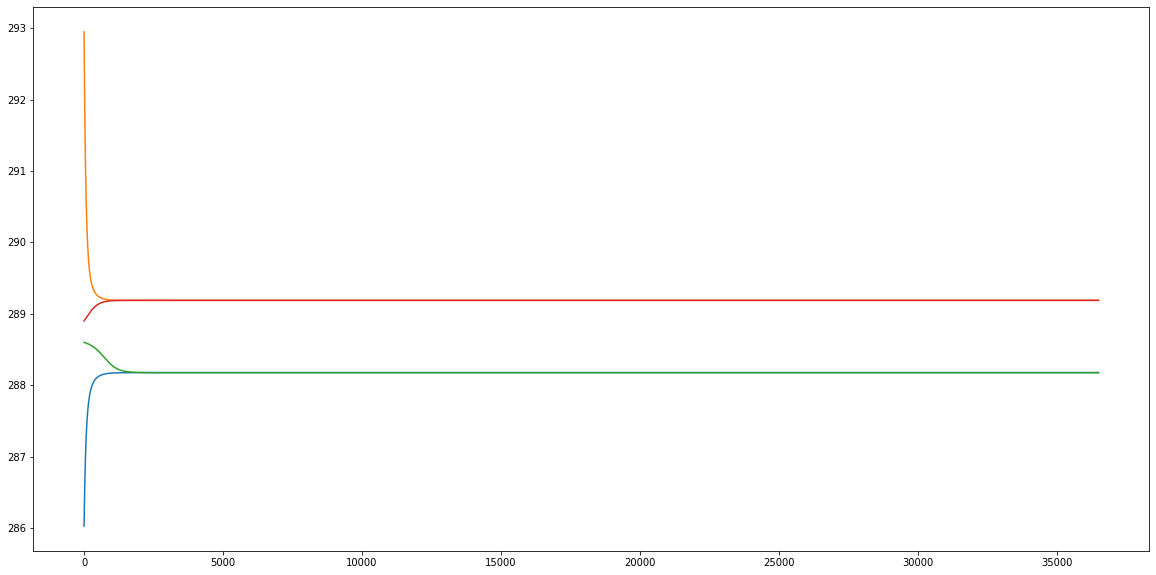

In [8]:
ts286 = ebmIceAlbedo(342,286,2*10**8,0.3,0.64,1000)
ts293 = ebmIceAlbedo(342,293,2*10**8,0.3,0.64,1000)
ts288_6 = ebmIceAlbedo(342,288.6,2*10**8,0.3,0.64,1000)
ts288_9 = ebmIceAlbedo(342,288.9,2*10**8,0.3,0.64,1000)

fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.plot(ts286)
ax.plot(ts293)
ax.plot(ts288_6)
ax.plot(ts288_9)


#### Repeat the previous simulation, but again sample the transmissivity on a normal distribution with a standard deviation of 3%.  
What special feature can now be observed? What conclusions can be inferred regarding the prediction of
weather and climate?


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def ebmIceAlbedoStochastic(SWin,T0,c,alpha,tau,years):
    ''' This is a simple Energy Balance Model with global radiation and outgoing longwave radiation.

    Syntax: ebm(T0,c,alpha,tau)

    with
    T0     :: Initial temperature (Kelvin)
    c      :: Heat capacity J/(m2*K)
    alpha  :: Albedo [-]
    tau    :: Transmissivity [-]

    Example: ebm(273.2, 10e8, 0.3, 0.64)

    Author: Tobias Sauter
    Date:   06/04/2022
    '''

    # Constants
    epsilon = 5.67e-8;    # Stefan-Bolzmann Constant (W/(m2*K4);

    # Time step
    steps = 10;                           # days
    dt = 60*60*24*steps;                  # convert days to seconds
    integration = (365/steps)*years;      # Integrate over x years

    # Init arrays and variables
    timeseries = [];
    Ti = T0;

    # Calculation
    for z in range(int(integration)):
        tau_rnd = random.normalvariate(tau,tau*0.03)
        alpha_adapt = alpha * (1 - 0.025 * np.tanh(1.548*(Ti-288.67)))
        T = Ti + (dt/c * (SWin - alpha_adapt*SWin - 0.95*epsilon*(Ti**4)*tau_rnd))
        timeseries.append(T);
        Ti = T;
        
    return np.array(timeseries)

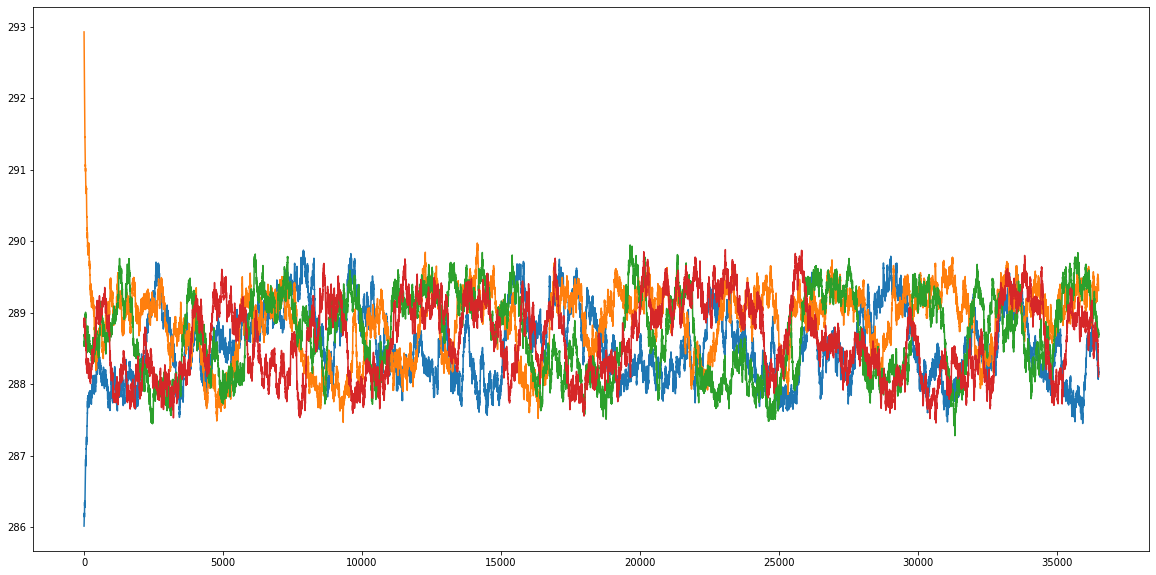

In [10]:
ts286 = ebmIceAlbedoStochastic(342,286,2*10**8,0.3,0.64,1000)
ts293 = ebmIceAlbedoStochastic(342,293,2*10**8,0.3,0.64,1000)
ts288_6 = ebmIceAlbedoStochastic(342,288.6,2*10**8,0.3,0.64,1000)
ts288_9 = ebmIceAlbedoStochastic(342,288.9,2*10**8,0.3,0.64,1000)

fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.plot(ts286)
ax.plot(ts293)
ax.plot(ts288_6)
ax.plot(ts288_9)